In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
%matplotlib inline

In [101]:
raw_df=pd.read_csv("advertising.csv")

In [102]:
df = raw_df.copy()	

In [103]:
df.shape

(200, 4)

In [104]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [105]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [107]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

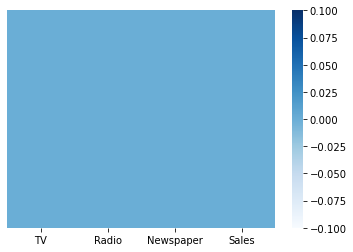

In [108]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Blues')

In [109]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

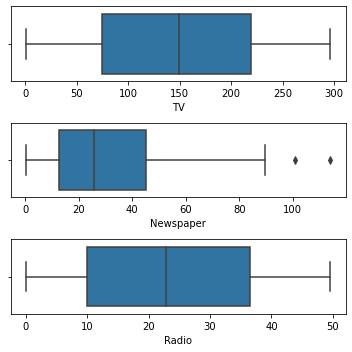

In [110]:
fig,axs = plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df['TV'],ax=axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

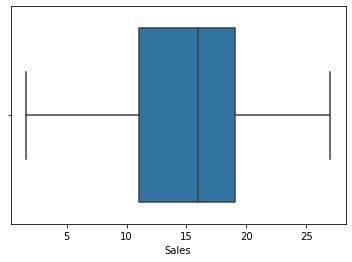

In [111]:
sns.boxplot(df['Sales'])
plt.show()

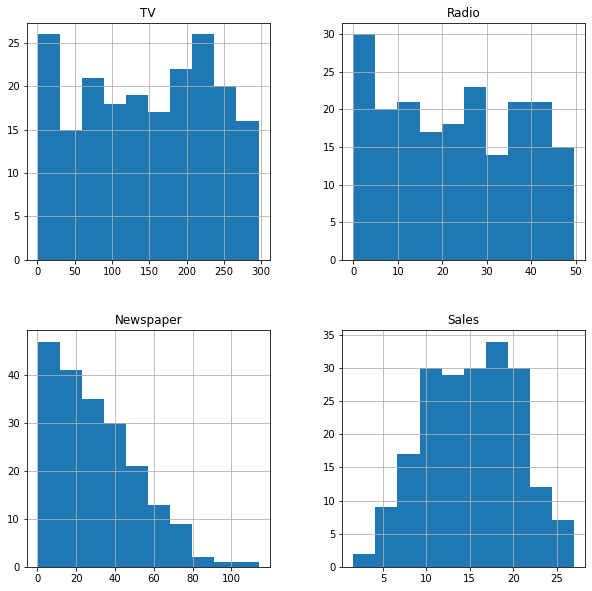

In [112]:
df.hist(bins=10,figsize=(10,10))
plt.show()

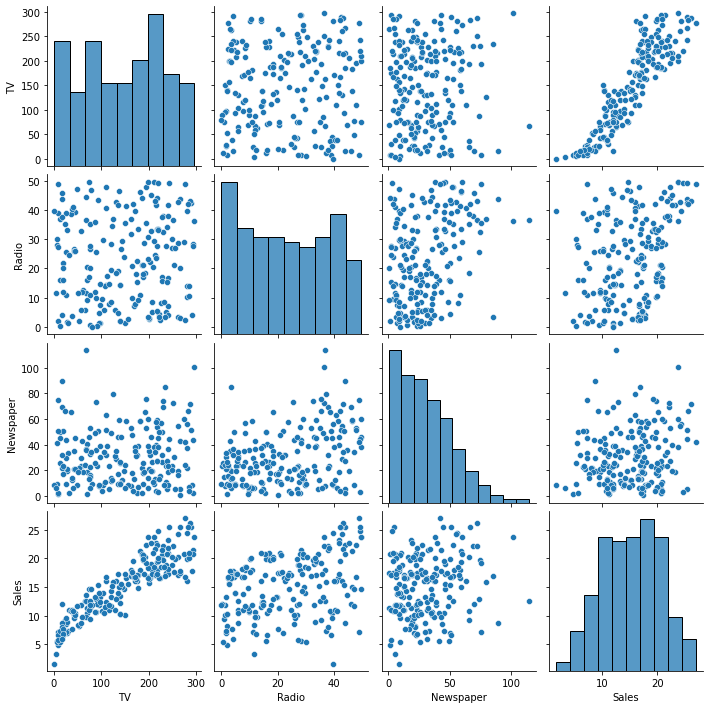

In [113]:
sns.pairplot(df,height=2.5)
plt.show()

<AxesSubplot:>

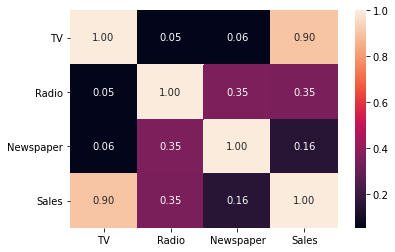

In [114]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt=".2f")

In [115]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [118]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [119]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [0.05505166 0.10289854 0.00435186]
Intercept : 4.511128020091029


In [120]:
y_pred = regressor.predict(X_test)

In [121]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.3045111912297251


In [122]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9006409689782177